In [2]:
! pip install opendatasets wordcloud textblob

     ------------------------------------ 636.8/636.8 kB 401.1 kB/s eta 0:00:00


In [3]:
import opendatasets as od
import pandas as pd
import seaborn as sns

     ------------------------------------ 636.8/636.8 kB 328.7 kB/s eta 0:00:00


In [4]:
od.download('https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset/download?datasetVersionNumber=1')


Skipping, found downloaded files in ".\flipkart-product-customer-reviews-dataset" (use force=True to force download)


In [5]:
df = pd.read_csv('flipkart-product-customer-reviews-dataset/Dataset-SA.csv')

In [6]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


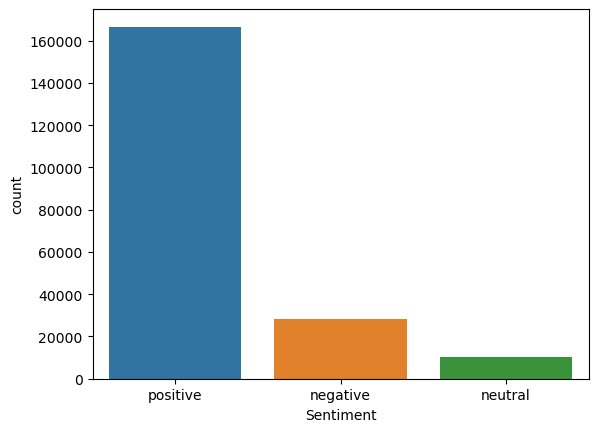

In [7]:
#Visualize sentiments
ax = sns.countplot(x='Sentiment',data=df)

In [8]:
#Check for values in each class
df['Sentiment'].value_counts()

positive    166581
negative     28232
neutral      10239
Name: Sentiment, dtype: int64

In [9]:
#Check for nulls 
df.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer


# Check for missing values
print(df.isnull().sum())

# Define the imputer and fit it to the data
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[['Review', 'Summary']])

# Transform the data to fill in missing values
df[['Review', 'Summary']] = imputer.transform(df[['Review', 'Summary']])

# Check for missing values again
print(df.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64
product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


[nltk_data] Downloading package punkt to C:\Users\John Tlaletso
[nltk_data]     Diale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\John Tlaletso Diale\AppData\Local\Temp\ipykernel_9132\2688778278.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['Summary'] = reviews['Summary'].str.replace('[^\w\s]','')


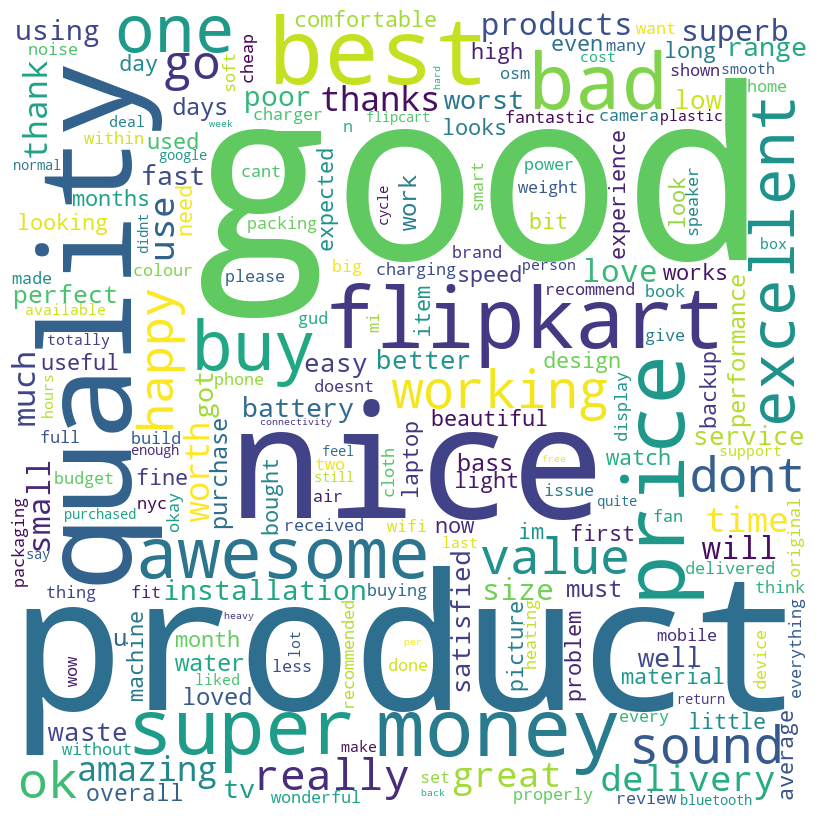

In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Load the product review dataset
reviews = df

# Preprocess the data
reviews['Summary'] = reviews['Summary'].str.lower()
reviews['Summary'] = reviews['Summary'].str.replace('[^\w\s]','')
reviews['Summary'] = reviews['Summary'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha()]))

# Count the frequency of words
word_freq = Counter(' '.join(reviews['Summary']).split())

# Remove stop words
stop_words = set(STOPWORDS)
word_freq = {word: freq for word, freq in word_freq.items() if word not in stop_words}

# Create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate_from_frequencies(word_freq)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



[nltk_data] Downloading package stopwords to C:\Users\John Tlaletso
[nltk_data]     Diale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


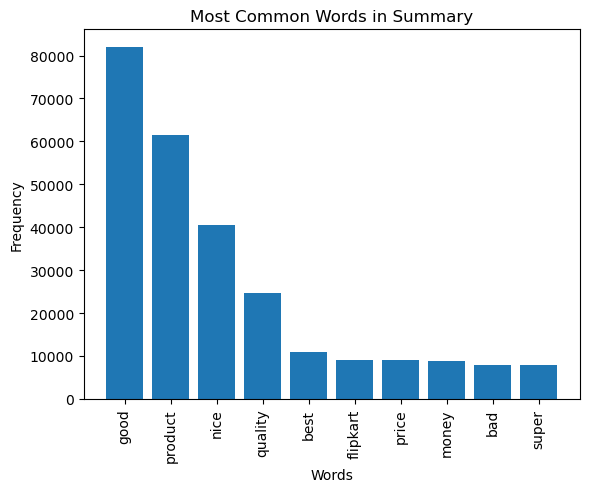

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')

# Extract the most common words from the summary column
summary_words = reviews['Summary'].str.split(expand=True).unstack().value_counts()

# Remove stop words
stop_words = set(stopwords.words('english'))
summary_words = summary_words.drop(stop_words, errors='ignore')

# Plot the bar chart
plt.bar(summary_words[:10].index, summary_words[:10])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Summary')
plt.show()


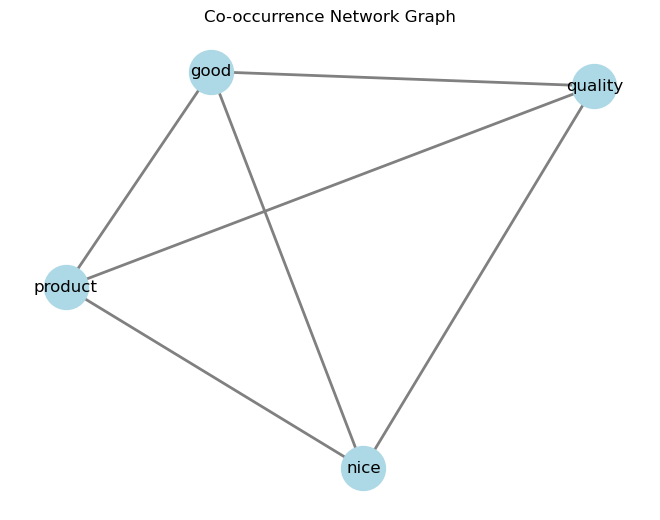

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Load the dataset
df = reviews

# Extract the most common words from the summary column
summary_words = df['Summary'].str.split(expand=True).stack().value_counts().head(10).reset_index()
summary_words.columns = ['word', 'count']

# Remove stop words
stop_words = set(stopwords.words('english'))
summary_words = summary_words[~summary_words['word'].isin(stop_words)]

# Create a co-occurrence matrix of the words in the summary column
co_matrix = pd.DataFrame(0, index=summary_words['word'], columns=summary_words['word'])
for summary in df['Summary']:
    words = set(summary.split())
    for w1 in words:
        if w1 in summary_words['word'].values:
            for w2 in words:
                if w2 in summary_words['word'].values and w1 != w2:
                    co_matrix.loc[w1, w2] += 1

# Create the network graph
G = nx.from_pandas_adjacency(co_matrix)

# Set the node labels and positions
pos = nx.spring_layout(G, seed=42)
labels = {node: node for node in G.nodes}

# Plot the network graph
nx.draw(G, pos, with_labels=True, labels=labels, font_size=12, node_color='lightblue', edge_color='gray', width=2, node_size=1000)
plt.title('Co-occurrence Network Graph')
plt.show()


In [14]:
import nltk
from nltk.probability import FreqDist
import os
from collections import Counter
import statistics

Corpus = reviews

#Calculate the total number of unique video games
asinString = " ".join(Corpus['Review'])
tokens = nltk.word_tokenize(asinString)
fdist = FreqDist(tokens)
count_asin = len(fdist)

# Calculate the total number of unique reviewers
reviewerIDString = " ".join(Corpus['product_name'])
tokens = nltk.word_tokenize(reviewerIDString)
fdist = FreqDist(tokens)
count_reviewerID = len(fdist)

# Set data in variables for the dataframe
totalReviews = int(Corpus.shape[0])
file_size = os.path.getsize(r"C:\Users\John Tlaletso Diale\Desktop\FlipKart_NLP\flipkart-product-customer-reviews-dataset\Dataset-SA.csv")
fileSize = int(round((file_size/2**20),2))
avgPerUser = int(round(statistics.mean(Counter(Corpus['product_name']).values()),2))
avgPerVG = int(round(statistics.mean(Counter(Corpus['Review']).values()),2))
minReviews = min(Counter(Corpus['Review']).values())
maxReviews = max(Counter(Corpus['Review']).values())

# Create a new dataframe to print a clear table
d1 = {'Description': ["Total reviews",
                      "File size (MB)",
                      "Total number of unique products",
                      "Total number of unique reviewers",
                      "Average number of reviews per user", 
                      "Average number of reviews per product",
                      "Product with the minimum reviews",
                      "Product with the maximum reviews"],
      'Data': [totalReviews, fileSize, count_asin, count_reviewerID, avgPerUser, avgPerVG, minReviews, maxReviews]}

df1 = pd.DataFrame(data=d1)
df1

,Description,Data
0,Total reviews,205052
1,File size (MB),31
2,Total number of unique products,1359
3,Total number of unique reviewers,3657
4,Average number of reviews per user,214
5,Average number of reviews per product,154
6,Product with the minimum reviews,1
7,Product with the maximum reviews,33680


In [15]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


# Define the preprocessing functions
def preprocess(text):
    # Convert all text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words and punctuations
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    # Remove numerical values
    words = [word for word in words if not word.isnumeric()]
    
    # Stem the words using Porter stemmer
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Lemmatize the words using WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    
    return text

# Create a new column with preprocessed text
df['preprocessed_text'] = df['Summary'].apply(preprocess)


[nltk_data] Downloading package stopwords to C:\Users\John Tlaletso
[nltk_data]     Diale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\John Tlaletso
[nltk_data]     Diale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\John Tlaletso
[nltk_data]     Diale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\John Tlaletso
[nltk_data]     Diale\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment,preprocessed_text
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,great cooler excel air flow price amaz unbelie...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget fit cooler nice cooling,positive,best budget fit cooler nice cool
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,qualiti good power air decent
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,bad product fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,ok ok product
...,...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,good product
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,nice
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,nice fast deliveri
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,awesom product


In [17]:
! pip install imbalanced-learn 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE

df=reviews


le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

X_train, X_test, y_train,y_test = train_test_split(df['preprocessed_text'],df['Sentiment'],test_size=0.2,random_state=42,stratify=df['Sentiment'])


In [19]:
y_train.value_counts()

2    133264
0     22586
1      8191
Name: Sentiment, dtype: int64

In [20]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


c:\Users\John Tlaletso Diale\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.51      0.67      0.58      5646
           1       0.17      0.70      0.27      2048
           2       0.97      0.73      0.83     33317

    accuracy                           0.72     41011
   macro avg       0.55      0.70      0.56     41011
weighted avg       0.87      0.72      0.77     41011



In [21]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('Naive Bayes', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.82      0.68      5646
           1       0.36      0.61      0.45      2048
           2       0.97      0.86      0.91     33317

    accuracy                           0.84     41011
   macro avg       0.64      0.76      0.68     41011
weighted avg       0.89      0.84      0.86     41011



In [22]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('SMOTE', SMOTE(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      5646
           1       0.33      0.65      0.44      2048
           2       0.97      0.88      0.92     33317

    accuracy                           0.86     41011
   macro avg       0.66      0.78      0.70     41011
weighted avg       0.90      0.86      0.87     41011



In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# transform the training data using the vectorizer
X_train_vect = vectorizer.fit_transform(X_train)

# define the base estimator
base_estimator = MultinomialNB()

# define the bagging classifier
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# fit the bagging classifier to the training data
bagging.fit(X_train_vect, y_train)

# transform the test data using the vectorizer
X_test_vect = vectorizer.transform(X_test)

# predict on the test data
y_pred = bagging.predict(X_test_vect)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65      5646
           1       0.90      0.27      0.41      2048
           2       0.89      0.99      0.94     33317

    accuracy                           0.89     41011
   macro avg       0.89      0.59      0.67     41011
weighted avg       0.89      0.89      0.87     41011



In [28]:
text = "i really love this product i wish i could buy another one"

test = vectorizer.transform(text)

bagging.predict(test)

ValueError: Iterable over raw text documents expected, string object received.

In [23]:
import joblib as jb 

jb.dump('navive bayes',)

TypeError: dump() missing 1 required positional argument: 'filename'